In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from func.EI_calculation import local_ei_cell
from func.EI_calculation import homo_ca_ei
from ca_generate import cellular_automaton_homo
%matplotlib inline

# 已知动力学 动力学异质 噪音不同

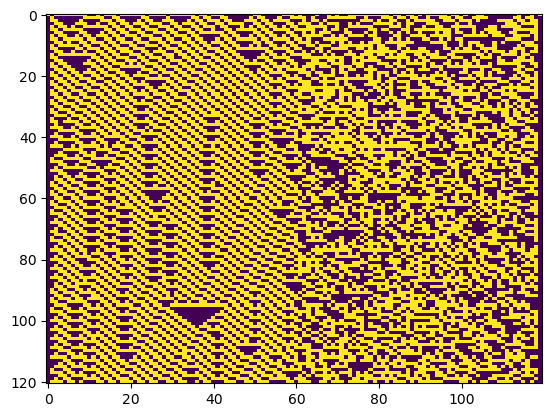

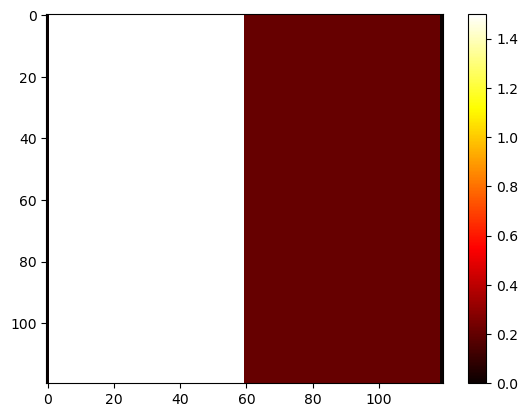

In [3]:
seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton_homo(rule=110, generations=120, p0_list=[0.01,0.3], size=120,middle_size=2)
#

# 已知动力学 动力学异质 f不同

In [12]:
from ca_generate import generate_markov
cell_ei_list=[]
middle_size = 2
for rule in range(256):
    markov_m = generate_markov(p0=0, rule=rule, middle_size=middle_size)
    ei = homo_ca_ei(markov_m,middle_size)
    print('rule = '+str(rule)+' ei ='+str(ei))
    cell_ei_list.append(ei)

rule = 0 ei =0.0
rule = 1 ei =0.6084585933443496
rule = 2 ei =0.7806390622295665
rule = 3 ei =1.1556390622295665
rule = 4 ei =0.7806390622295665
rule = 5 ei =1.0
rule = 6 ei =1.1556390622295665
rule = 7 ei =1.2028195311147831
rule = 8 ei =0.7806390622295665
rule = 9 ei =1.1556390622295665
rule = 10 ei =1.0
rule = 11 ei =1.2028195311147831
rule = 12 ei =1.1556390622295665
rule = 13 ei =1.0306390622295665
rule = 14 ei =1.2028195311147831
rule = 15 ei =1.0
rule = 16 ei =0.7806390622295665
rule = 17 ei =1.1556390622295665
rule = 18 ei =1.3278195311147831
rule = 19 ei =1.4528195311147831
rule = 20 ei =1.1556390622295665
rule = 21 ei =1.2028195311147831
rule = 22 ei =1.2028195311147831
rule = 23 ei =1.1556390622295665
rule = 24 ei =1.5
rule = 25 ei =1.625
rule = 26 ei =1.625
rule = 27 ei =1.5
rule = 28 ei =1.625
rule = 29 ei =1.3278195311147831
rule = 30 ei =1.5
rule = 31 ei =1.2028195311147831
rule = 32 ei =0.7806390622295665
rule = 33 ei =1.3278195311147831
rule = 34 ei =1.1556390622295665

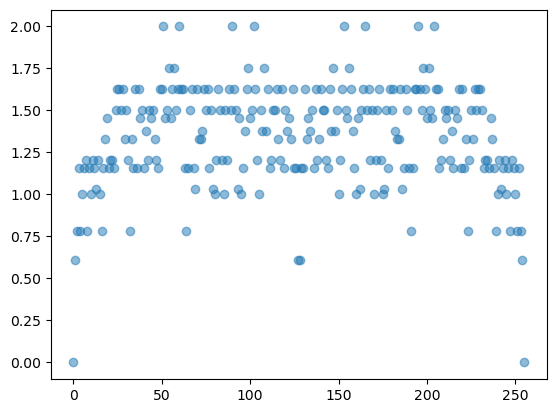

In [13]:
plt.scatter(range(256),cell_ei_list,alpha=0.5)

In [14]:
cell_ei_list[250],cell_ei_list[108],cell_ei_list[90],cell_ei_list[110]

(1.0, 1.75, 2.0, 1.625)

In [15]:
cell_ei_list[110],cell_ei_list[111],cell_ei_list[108],cell_ei_list[106], cell_ei_list[102], cell_ei_list[126], cell_ei_list[78], cell_ei_list[46], cell_ei_list[228]

(1.625,
 1.1556390622295665,
 1.75,
 1.5,
 2.0,
 1.1556390622295665,
 1.5,
 1.3278195311147831,
 1.5)

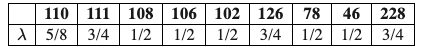

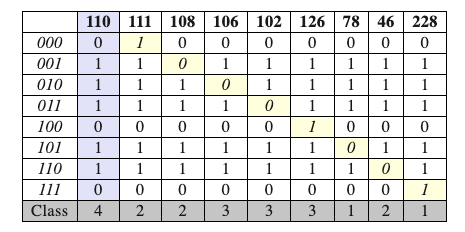

# 已知动力学 动力学同质